# Imports

In [1]:
# import nltk
# nltk.download('brown')
from nltk.corpus import brown
import pandas as pd
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# counstruct a stop words list consisiting of nltk.corpus english words plus punctuations
full_stop_words = nltk.corpus.stopwords.words('english') + list(punctuation)
full_stop_words.append("--")
full_stop_words.append("``")
full_stop_words.append("''")

# Activity 3

## 3.1 Sub-activity: Loading the Brown corpus data from NLTK

### Task 1

In [3]:
# Print the name of all categories of the corpus in alphabetical order.
brown_category = brown.categories()
sorted(brown_category,key = lambda x: x)
print(brown_category)

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


### Task 2

In [4]:
# Provide an overview of corpus statistics in a pandas.DataFrame named brown corpus:
brown_corpus = pd.DataFrame(columns = ['category_name','count_words','count_sentences','count_paragraphs','common_words'])
for category in brown_category:
    category_name = category
    # count the number of words in corpus
    count_words = len(brown.words(categories=category))
    # count the number of sentences in corpus
    count_sentences = len(brown.sents(categories=category))
    # count the number of paragraphs
    count_paragraphs = len(brown.paras(categories=category))
    words_and_times = nltk.FreqDist(brown.words(categories=category)).most_common(10)
    words = []
    for current_word in words_and_times:
        words.append(current_word[0])
    brown_corpus = brown_corpus.append({'category_name':category_name, 'count_words':count_words, 'count_sentences':count_sentences,'count_paragraphs':count_paragraphs,'common_words':words}, ignore_index=True)

In [5]:
# add the 6th column in the data frame and then print the first 10 row of this data frame;
common_words_after_preprocessing = []
for category in brown_category:
    all_words = brown.words(categories=category)
    all_words = [word for word in all_words if word.lower() not in full_stop_words]
    words_and_times = nltk.FreqDist(all_words).most_common(10)
    words = []
    for current_word in words_and_times:
        words.append(current_word[0])
    common_words_after_preprocessing.append(words)
brown_corpus['common_words_after_preprocessing'] = common_words_after_preprocessing


In [6]:
#  print the first 10 row of this data frame;
brown_corpus[:10][:]


,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing
0,adventure,69342,4637,1387,"[., ,, the, and, a, of, to, ``, '', was]","[said, would, back, man, one, could, like, tim..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[one, would, time, man, could, may, even, two,..."
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[would, one, Mr., new, American, United, peopl..."
3,fiction,68488,4249,1043,"[,, ., the, and, to, of, a, was, in, he]","[would, said, one, could, like, man, back, tim..."
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[year, States, United, may, would, made, devel..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, to, a, in, is, for]","[one, may, time, two, first, many, new, also, ..."
6,humor,21695,1053,254,"[,, the, ., of, and, a, to, ``, '', in]","[said, one, would, time, even, Mr., like, coul..."
7,learned,181888,7734,1418,"[the, ,, of, ., and, to, in, a, is, that]","[Af, one, may, would, 1, two, first, also, tim..."
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[one, would, time, may, first, could, people, ..."
9,mystery,57169,3886,1164,"[., ,, the, to, and, a, of, was, ``, '']","[said, would, one, back, could, like, man, get..."


## 3.2 Sub-activity: Applying NLP operations on the corpus

### 3.2.1 Stemming

#### Task 3

In [7]:
all_news_words = brown.words(categories='news')
# remove all stop words
news_words = [word for word in all_news_words if word.lower() not in full_stop_words]

# do not stem, just find the unique value in news_words
freq_dist_news_words = nltk.FreqDist(news_words)
print("There are {} unique records in category news before applying the PorterStemmer.".format(len(list(freq_dist_news_words.keys()))))


There are 14141 unique records in category news before applying the PorterStemmer.


In [8]:
ps = PorterStemmer()
porter_stemmer_result = []
# stem every word in news_words
for w in news_words:
    porter_stemmer_result.append(ps.stem(w))    
freq_dist_porter_stemmer_result = nltk.FreqDist(porter_stemmer_result)
freq_dist_porter_stemmer_result_unique = freq_dist_porter_stemmer_result.hapaxes()
print("There are {} unique records in category news after applying the PorterStemmer".format(len(list(freq_dist_porter_stemmer_result.keys()))))


There are 9625 unique records in category news after applying the PorterStemmer


#### Task 4

In [9]:
all_fiction_words = brown.words(categories='fiction')
# remove all stop words
fiction_words = [word for word in all_fiction_words if word.lower() not in full_stop_words]

# do not stem, just find the unique value in news_words
freq_dist_fiction_words = nltk.FreqDist(fiction_words)
print("There are {} unique records in category fiction before applying SnowballStemmer.".format(len(list(freq_dist_fiction_words.keys()))))


There are 9035 unique records in category fiction before applying SnowballStemmer.


In [10]:
sb = SnowballStemmer('english')
snowball_stemmer_result = []
for w in fiction_words:
    snowball_stemmer_result.append(sb.stem(w))
freq_dist_snowball_stemmer_result = nltk.FreqDist(snowball_stemmer_result)
freq_dist_snowball_stemmer_result_unique = freq_dist_snowball_stemmer_result.hapaxes()
print("There are {} unique records in category fiction after applying SnowballStemmer".format(len(freq_dist_snowball_stemmer_result.keys())))


There are 6125 unique records in category fiction after applying SnowballStemmer


### 3.2.2 Lemmatization

#### Task 5

In [11]:
all_government_words = brown.words(categories='government')
government_words = [word.lower() for word in all_government_words if word.lower() not in full_stop_words]
freq_dist_government_words = nltk.FreqDist(government_words)
print("There are {} unique words in category government before applying WordNetLemmatizer.".format(len(list(freq_dist_government_words.keys()))))


There are 7223 unique words in category government before applying WordNetLemmatizer.


In [12]:
# apply WordNetLemmatizer
stemmer = WordNetLemmatizer()
word_net_lemmatizer_result = []
for w in government_words:
    word_net_lemmatizer_result.append(stemmer.lemmatize(w))
freq_dist_word_net_lemmatizer_result=nltk.FreqDist(word_net_lemmatizer_result)
# print(len(freq_dist_word_net_lemmatizer_result_unique))
print("There are {} unique words in category government after applying WordNetLemmatizer.".format(len(list(freq_dist_word_net_lemmatizer_result.keys()))))


There are 6431 unique words in category government after applying WordNetLemmatizer.


### 3.2.3 Finding synonyms and antonyms

#### Task 6

In [13]:
def get_synonyms(words_list):
    """
        :param: words_list:  a list of words
        :return: a list of all their synonyms
        """
    synonyms = []
    for word in words_list:
        for syn in wordnet.synsets(word):
            for lm in syn.lemmas():
                synonyms.append(lm.name())
    synonyms = list(set(synonyms))
    return synonyms

In [14]:
# add a 'synonyms' column to the dataFrame
brown_corpus['synonyms'] = brown_corpus['common_words_after_preprocessing'].apply(get_synonyms)

In [15]:
def get_antonyms(words_list):
    """
        :param: words_list:  a list of words
        :return: a list of all their antonyms
    """
    antonyms = []
    for word in words_list:
        for syn in wordnet.synsets(word):
            for lm in syn.lemmas():
                if lm.antonyms():
                    antonyms.append(lm.antonyms()[0].name())
    antonyms = list(set(antonyms))
    return antonyms

In [16]:
# add a 'antonyms' column to the dataFrame.
brown_corpus['antonyms'] = brown_corpus['common_words_after_preprocessing'].apply(get_antonyms)

In [17]:
# Print the first ten rows of the dataframe.
brown_corpus[:10][:]

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing,synonyms,antonyms
0,adventure,69342,4637,1387,"[., ,, the, and, a, of, to, ``, '', was]","[said, would, back, man, one, could, like, tim...","[plunk_for, dorsum, similar, bet_on, Isle_of_M...","[dislike, woman, civilian, front, take_away, u..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[one, would, time, man, could, may, even, two,...","[Crataegus_laevigata, Isle_of_Man, one, valet,...","[odd, woman, civilian, uneven]"
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[would, one, Mr., new, American, United, peopl...","[Crataegus_laevigata, newfangled, creation, on...","[worn, disunify, divided, old, divide]"
3,fiction,68488,4249,1043,"[,, ., the, and, to, of, a, was, in, he]","[would, said, one, could, like, man, back, tim...","[similar, dorsum, plunk_for, bet_on, Isle_of_M...","[woman, civilian, front, veer, tall, unlike, l..."
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[year, States, United, may, would, made, devel...","[name, res_publica, Crataegus_laevigata, provi...","[nondevelopment, disunify, divided, unmade, un..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, to, a, in, is, for]","[one, may, time, two, first, many, new, also, ...","[Crataegus_laevigata, honorable, newfangled, o...","[worn, last, bad, misused, few, old, evil, evi..."
6,humor,21695,1053,254,"[,, the, ., of, and, a, to, ``, '', in]","[said, one, would, time, even, Mr., like, coul...","[similar, one, single, fifty-fifty, tied, thin...","[odd, unlike, unalike, uneven, dislike]"
7,learned,181888,7734,1418,"[the, ,, of, ., and, to, in, a, is, that]","[Af, one, may, would, 1, two, first, also, tim...","[ii, Crataegus_laevigata, inaugural, start, ou...","[second, last, middle]"
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[one, would, time, may, first, could, people, ...","[name, Crataegus_laevigata, wee, one, construc...","[last, few, unmade, middle, unmake, break, sec..."
9,mystery,57169,3886,1164,"[., ,, the, to, and, a, of, was, ``, '']","[said, would, one, back, could, like, man, get...","[plunk_for, dorsum, similar, cognize, bet_on, ...","[dislike, woman, civilian, front, take_away, u..."


### 3.2.4 Bigrams and trigrams

#### Task 7

In [18]:
# select the last 500 paragraphs occurring in the paragraph list of the Brown corpus.
last_500_brown_paragraph =  list(brown.paras()[-500:])

#### Task 8

In [19]:
def get_bigrams_frequency(list_of_paragraphs):
    """
        :param: list_of_paragraphs:  a list of paragraphs
        :return: A dictionary. The keys of the dictionary are the bigrams and the values are the corresponding frequencies
    """
    flat_paragraph = list(itertools.chain(*list(itertools.chain(*list_of_paragraphs))))
    flat_paragraph_clean = [word for word in flat_paragraph if word.lower() not in full_stop_words]
    bigram_last_500 = nltk.bigrams(flat_paragraph_clean)
    freq_bigram = nltk.FreqDist(bigram_last_500)
    return dict(freq_bigram)  

#### Task 9

In [20]:
# Save the dictionary in a variable named brown_bigrams
brown_bigrams = get_bigrams_frequency(last_500_brown_paragraph)
print('There are {} bigrams in total.'.format(len(brown_bigrams)))
brown_bigrams

There are 13920 bigrams in total.


{('Phil', 'turned'): 1,
 ('turned', 'left'): 1,
 ('left', 'room'): 2,
 ('room', 'hearing'): 1,
 ('hearing', 'Eddie'): 1,
 ('Eddie', 'say'): 2,
 ('say', 'Someday'): 1,
 ('Someday', 'see'): 1,
 ('see', 'right'): 1,
 ('right', 'Phil'): 1,
 ('Phil', 'shut'): 1,
 ('shut', 'door'): 1,
 ('door', 'behind'): 1,
 ('behind', 'Outside'): 1,
 ('Outside', 'dressing'): 1,
 ('dressing', 'room'): 1,
 ('room', 'Frankie'): 1,
 ('Frankie', 'Ricco'): 1,
 ('Ricco', 'sat'): 1,
 ('sat', 'bench'): 2,
 ('bench', 'dressed'): 1,
 ('dressed', 'street'): 1,
 ('street', 'clothes'): 1,
 ('clothes', 'happened'): 1,
 ('happened', 'Frankie'): 1,
 ('Frankie', 'asked'): 1,
 ('asked', 'Phil'): 1,
 ('Phil', 'said'): 4,
 ('said', 'got'): 3,
 ('got', 'release'): 1,
 ('release', 'crazy'): 1,
 ('crazy', 'Phil'): 1,
 ('Phil', 'shrugged'): 1,
 ('shrugged', 'Phil'): 1,
 ('Phil', 'sighed'): 1,
 ('sighed', 'Frankie'): 1,
 ('Frankie', 'shook'): 1,
 ('shook', 'head'): 1,
 ('head', 'get'): 1,
 ('get', 'know'): 1,
 ('know', 'Phil'): 1,


#### Task 10

In [21]:
# Print the 15 most frequently occurring bigrams of this dictionary
sorted_array_of_tuples = sorted(brown_bigrams.items(), key=lambda x: x[1], reverse=True)
most_frequently_occurring_bigrams = [x[0] for x in sorted_array_of_tuples]
print('The most 15 frequently occuring bigrms are:')
most_frequently_occurring_bigrams[:15]

The most 15 frequently occuring bigrms are:


[('years', 'ago'),
 ('Mr.', 'Crombie'),
 ('New', 'York'),
 ('Mr.', 'Blatz'),
 ('Mr.', 'Willis'),
 ('Mr.', 'Gorboduc'),
 ('Hanford', 'College'),
 ('humor', 'comedy'),
 ('next', 'morning'),
 ('Mr.', 'Partlow'),
 ('long', 'enough'),
 ('General', 'Burnside'),
 ('Phil', 'said'),
 ('Frankie', 'said'),
 ('Samuel', 'Burns')]

## 3.3 Sub-section: Visualisation

### 3.3.1 Barplots

#### Task 11

In [22]:
# prepare the data needed for plot
bars = brown_corpus['category_name']
number_of_words = brown_corpus['count_words']
number_of_paragraphs = brown_corpus['count_paragraphs']
number_of_sentence = brown_corpus['count_sentences']

#### Task 12

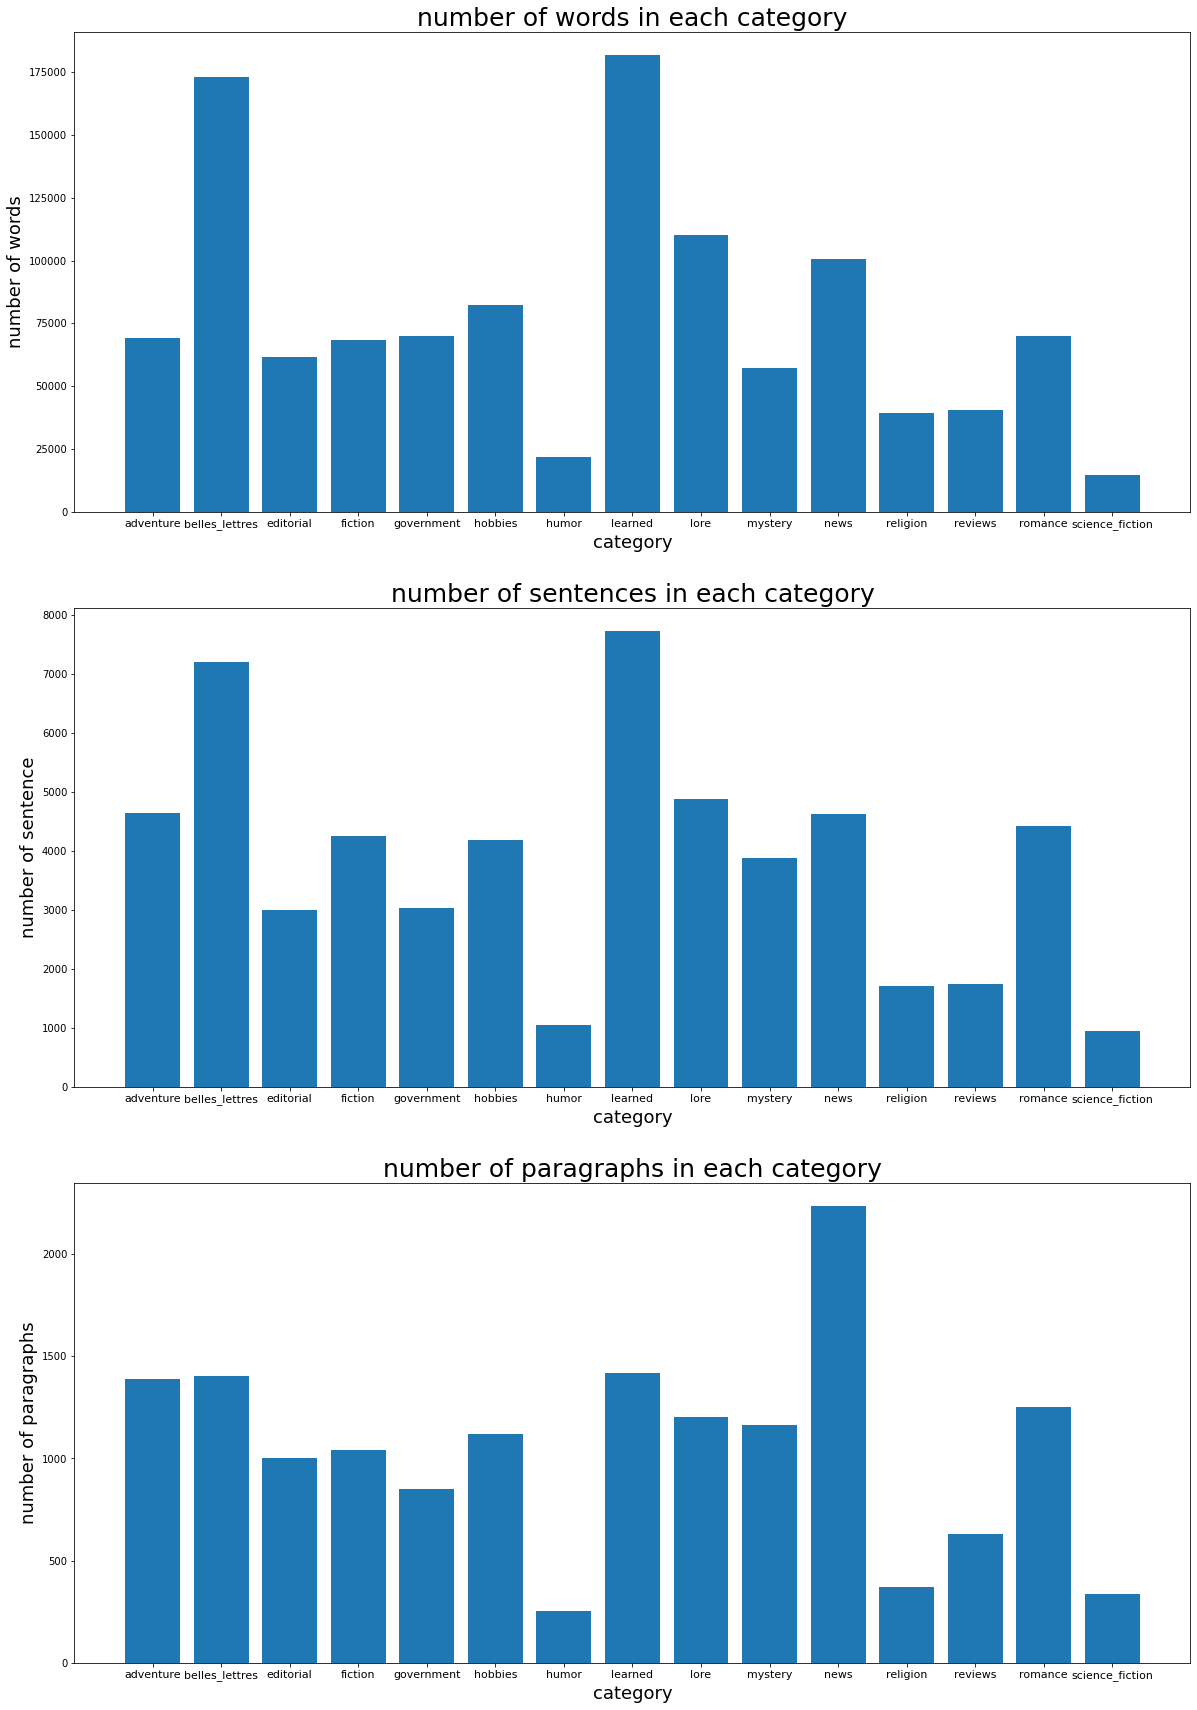

In [23]:
# plot the data on a figure.
plt.rc('xtick', labelsize=11) #fontsize of the x tick labels
fig = plt.figure(figsize=(20, 30),num=1)

ax1 = fig.add_subplot(3,1,1)
# Create bars
ax1.bar(bars, number_of_words)
# Create names on the x-axis
ax1.set_ylabel('number of words',size=18)
ax1.set_xlabel('category',size=18)
ax1.set_title('number of words in each category',size=25)

ax2 = fig.add_subplot(3,1,2)
# Create bars
ax2.bar(bars, number_of_sentence)
# Create names on the x-axis
ax2.set_ylabel('number of sentence',size=18)
ax2.set_xlabel('category',size=18)
ax2.set_title('number of sentences in each category',size=25)

ax3 = fig.add_subplot(3,1,3)
# Create bars
ax3.bar(bars, number_of_paragraphs)
# Create names on the x-axis
ax3.set_ylabel('number of paragraphs',size=18)
ax3.set_xlabel('category',size=18)
ax3.set_title('number of paragraphs in each category',size=25)

# Show graphic
plt.show()

#### Task 13

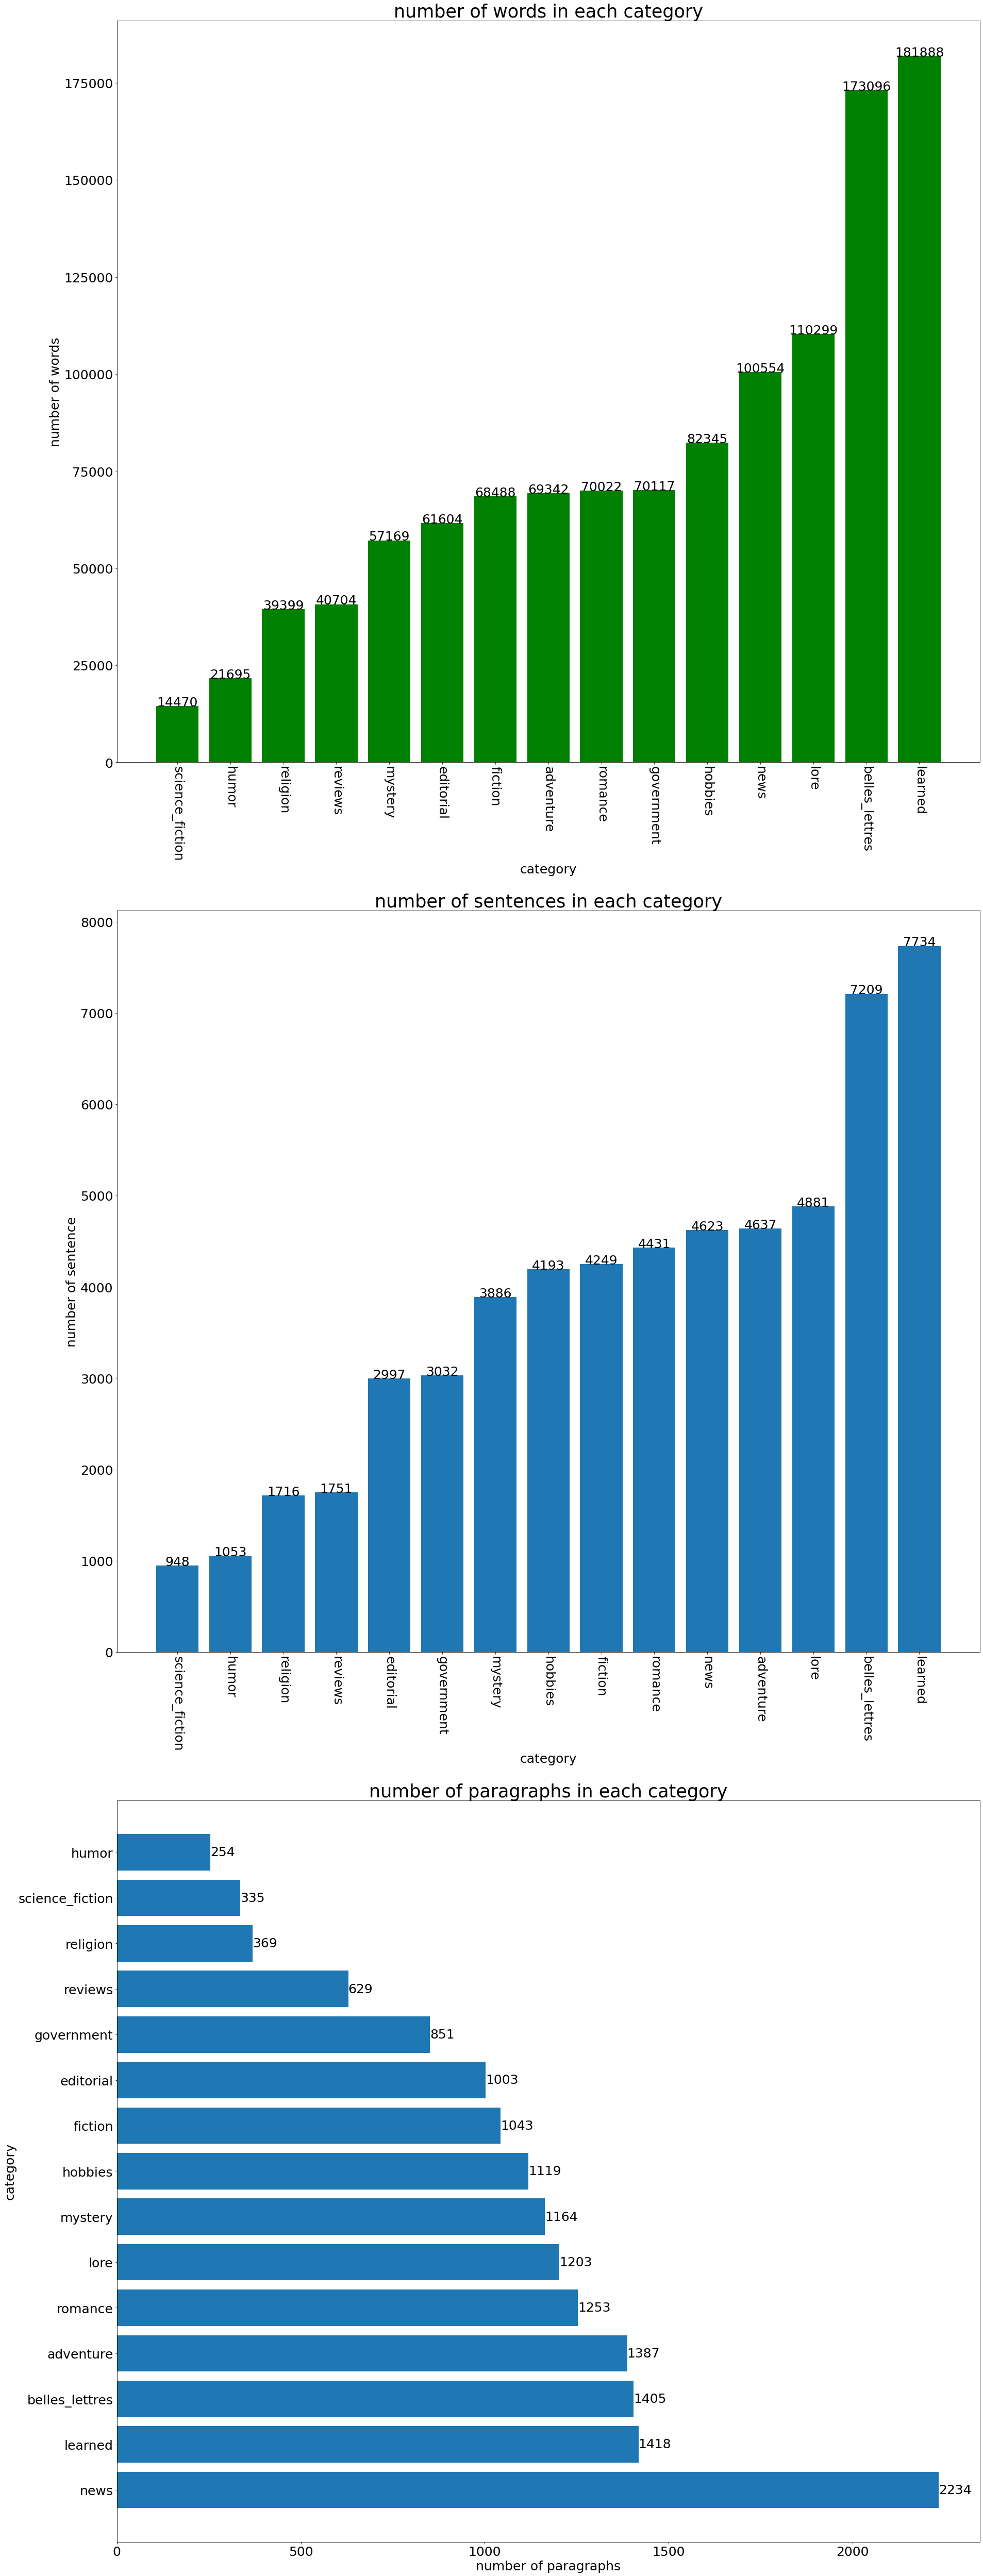

In [24]:
count_words_df = brown_corpus[['category_name','count_words']].copy(deep=True).sort_values(by=['count_words'],ascending=True)
count_sentences_df = brown_corpus[['category_name','count_sentences']].copy(deep=True).sort_values(by=['count_sentences'],ascending=True)
count_paragraphs_df = brown_corpus[['category_name','count_paragraphs']].copy(deep=True).sort_values(by=['count_paragraphs'],ascending=False)

count_words_bars = count_words_df['category_name']
count_sentences_bars = count_sentences_df['category_name']
count_paragraphs_bars = count_paragraphs_df['category_name']

number_of_words = count_words_df['count_words']
number_of_sentence = count_sentences_df['count_sentences']
number_of_paragraphs = count_paragraphs_df['count_paragraphs']

plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels

fig = plt.figure(figsize=(30, 90),num=1)
ax1 = fig.add_subplot(3,1,1)
# Create bars
# Change the color of the bars for the 1st barplot.
ax1.bar(count_words_bars, number_of_words,color='g')

# Create names on the x-axis
ax1.set_ylabel('number of words',size=25)
ax1.set_xlabel('category',size=25)
ax1.set_title('number of words in each category',size=35)

ax2 = fig.add_subplot(3,1,2)
# Create bars
ax2.bar(count_sentences_bars, number_of_sentence)
# Create names on the x-axis
ax2.set_ylabel('number of sentence',size=25)
ax2.set_xlabel('category',size=25)
ax2.set_title('number of sentences in each category',size=35)

ax3 = fig.add_subplot(3,1,3)
# Create bars,Replace the 3rd barplot by a horizontal barplot with the categories displayed on the y-axis
ax3.barh(count_paragraphs_bars, number_of_paragraphs)

# Create names on the x-axis
ax3.set_xlabel('number of paragraphs',size=25)
ax3.set_ylabel('category',size=25)
ax3.set_title('number of paragraphs in each category',size=35)

# Adjust x-axes labels for all barplots by rotating them by 90 degrees clockwise
for tick in ax1.get_xticklabels():
    tick.set_rotation(270)
for tick in ax2.get_xticklabels():
    tick.set_rotation(270)

    
# Include the exact count of words, sentences and paragraphs at the top of each bar in all three barplots.
for a, b, i in zip(count_words_bars, number_of_words,range(len(count_words_bars))):
    ax1.text(a, b, '%.0f' %b , ha='center', fontsize=25)
        
for a, b, i in zip(count_sentences_bars, number_of_sentence,range(len(count_sentences_bars))):
     ax2.text(a, b, '%.0f' %b , ha='center', fontsize=25)

for a, b, i in zip(count_paragraphs_bars, number_of_paragraphs,range(len(count_paragraphs_bars))):
    ax3.text(b, a, '%.0f' %b , ha='left', va='center', fontsize=25)
         
# Show graphic
plt.show()

### 3.3.2 Heatmap

#### Task 14

In [25]:
# prepare data
# most_frequent_15_bigrams = nltk.FreqDist(brown_bigrams).most_common(15)
most_frequent_15_bigrams = sorted_array_of_tuples[:15]
tmp_df = pd.DataFrame(columns=['most_frequent_15_bigrams','category','number_of_occurance'])
for category in brown_category:
    all_words = brown.paras(categories=category)
    flat_paragraph = list(itertools.chain(*list(itertools.chain(*all_words))))
    flat_paragraph_clean = [word for word in flat_paragraph if word.lower() not in full_stop_words]
    bigram_clean = nltk.bigrams(flat_paragraph_clean)
    freq_bigram = nltk.FreqDist(bigram_clean)
    for tup in most_frequent_15_bigrams:
        tmp_df = tmp_df.append({'most_frequent_15_bigrams':list(tup[0])[0] +" "+list(tup[0])[1], 'category':category, 'number_of_occurance':freq_bigram[tup[0]]}, ignore_index=True)

In [26]:
tmp_df

,most_frequent_15_bigrams,category,number_of_occurance
0,years ago,adventure,9
1,Mr. Crombie,adventure,0
2,New York,adventure,0
3,Mr. Blatz,adventure,0
4,Mr. Willis,adventure,0
...,...,...,...
220,long enough,science_fiction,0
221,General Burnside,science_fiction,0
222,Phil said,science_fiction,0
223,Frankie said,science_fiction,0


In [27]:
# convert the table from last step into a pivot table
tmp_df[['most_frequent_15_bigrams']]=tmp_df[['most_frequent_15_bigrams']].astype('str')
tmp_df[['category']] = tmp_df[['category']].astype('str')
tmp_df[['number_of_occurance']] = tmp_df[['number_of_occurance']].astype('int')
data = tmp_df.pivot("most_frequent_15_bigrams", "category", "number_of_occurance")
data

category,adventure,belles_lettres,editorial,fiction,government,hobbies,humor,learned,lore,mystery,news,religion,reviews,romance,science_fiction
most_frequent_15_bigrams,,,,,,,,,,,,,,,
Frankie said,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
General Burnside,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0
Hanford College,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
Mr. Blatz,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0
Mr. Crombie,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0
Mr. Gorboduc,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0
Mr. Partlow,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
Mr. Willis,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0
New York,0,57,24,10,33,25,3,7,30,8,52,4,30,13,0


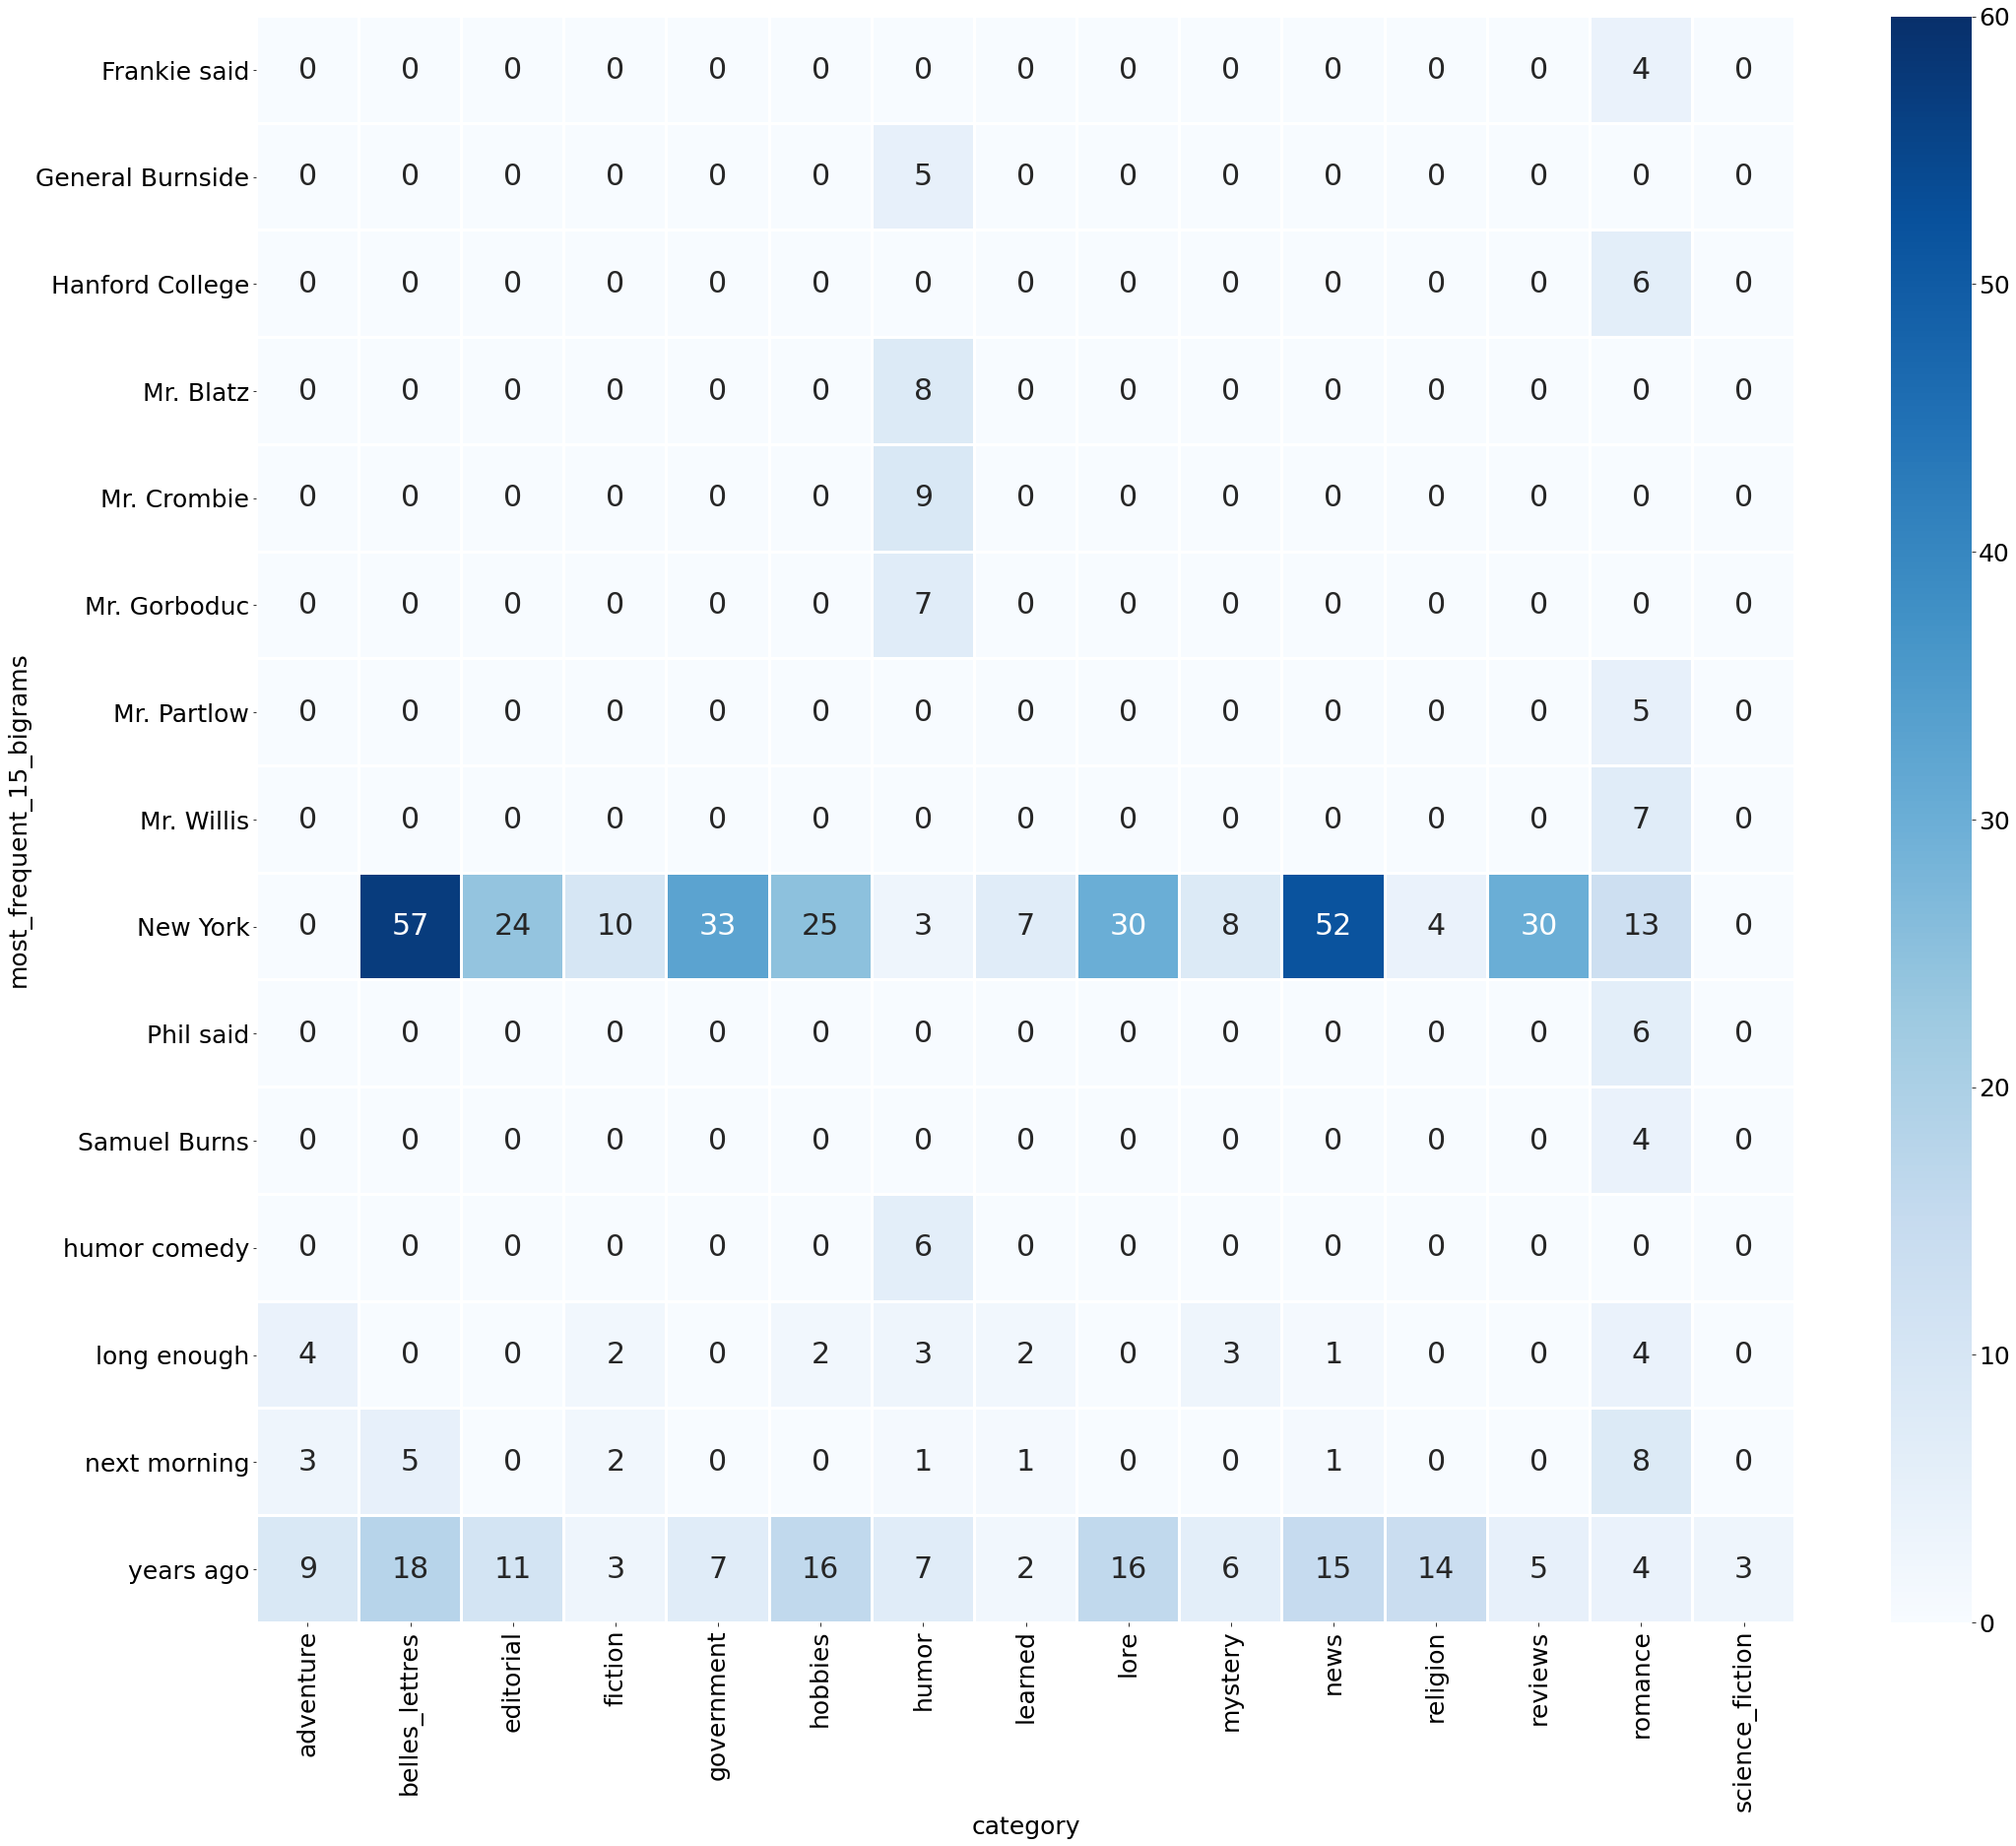

In [28]:
# draw the heatmap
fig = plt.figure(figsize=(35, 30),num=1)
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
ax = sns.heatmap(data,vmin=0, vmax=60,annot=True,linewidths=2,
            annot_kws={'size':30}, fmt="d",cmap="Blues")
ax.set_ylabel('most_frequent_15_bigrams',size=25)
ax.set_xlabel('category',size = 25)
plt.show()